Path to dataset files: C:\Users\Rohith S D\.cache\kagglehub\datasets\uciml\iris\versions\2
KNN Results with different K values:
K = 1 --> Accuracy = 0.97
K = 3 --> Accuracy = 1.00
K = 5 --> Accuracy = 1.00
K = 7 --> Accuracy = 1.00
K = 9 --> Accuracy = 1.00

Confusion Matrix (K=3):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


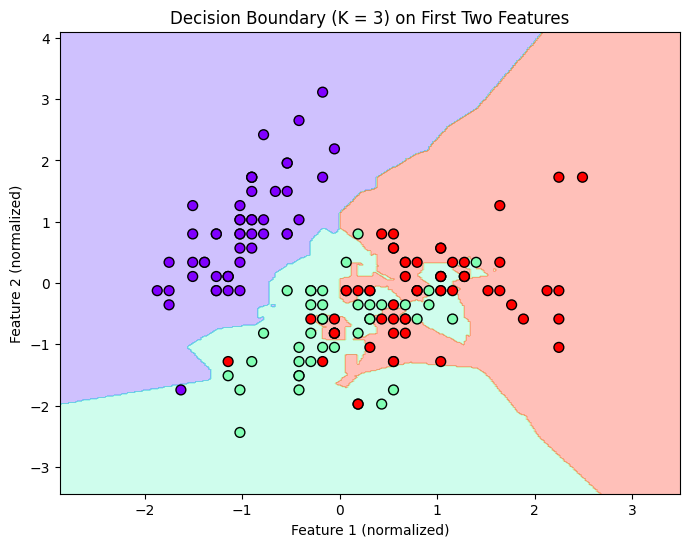

In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os

# Step 1: Download dataset from Kaggle using kagglehub
path = kagglehub.dataset_download("uciml/iris")
print("Path to dataset files:", path)

# Step 2: Load the CSV file
csv_path = os.path.join(path, "Iris.csv")
df = pd.read_csv(csv_path)

# Step 3: Preprocess
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop('Species', axis=1).values
y = df['Species'].astype('category').cat.codes.values  # Convert species names to numeric

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Try different K values
print("KNN Results with different K values:")
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} --> Accuracy = {acc:.2f}")

# Step 7: Final model and confusion matrix
final_k = 3
knn = KNeighborsClassifier(n_neighbors=final_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\nConfusion Matrix (K=3):")
print(confusion_matrix(y_test, y_pred))

# Step 8: Visualize decision boundary using first two features
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1 (normalized)")
    plt.ylabel("Feature 2 (normalized)")
    plt.show()

# Prepare and plot using only first two features
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=final_k)
knn_vis.fit(X_train_vis, y_train_vis)

plot_decision_boundary(X_vis, y, knn_vis, f"Decision Boundary (K = {final_k}) on First Two Features")
